Simple Neural Network For Handwritten Digits Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Load the digits dataset
(X_train,y_train) , (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

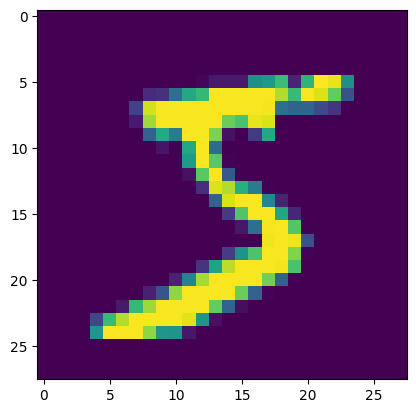

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# Scale the image metrics between 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# Convert 2d array to 1d array for traning set
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [11]:
# Convert 2d array to 1d array for testing set
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

###### Creating simple neural netwrok with 784 input layer neurons and 10 output layer neurons

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4646 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3034 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2665 - accuracy: 0.9257


In [13]:
# Try to evalute model on test dataset
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2664 - accuracy: 0.9280


[0.2663910984992981, 0.9279999732971191]

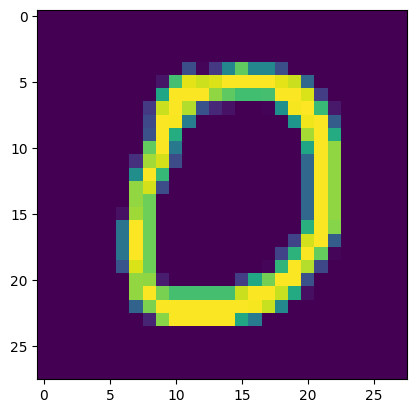

In [14]:
# Now try some predictions
plt.imshow(X_test[10])

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[10]

313/313 [==============================] - 0s 937us/step


array([9.98940885e-01, 2.64630586e-07, 6.21967614e-01, 1.22183114e-01,
       1.41499710e-04, 8.26350510e-01, 4.79129665e-02, 2.40817262e-05,
       5.64572632e-01, 3.88911256e-04], dtype=float32)

In [16]:
# now find the index of max value from above prediction
np.argmax(y_predicted[10])

0

In [17]:
# First we need to convert y_predictecd array to int 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Text(95.72222222222221, 0.5, 'Truth')

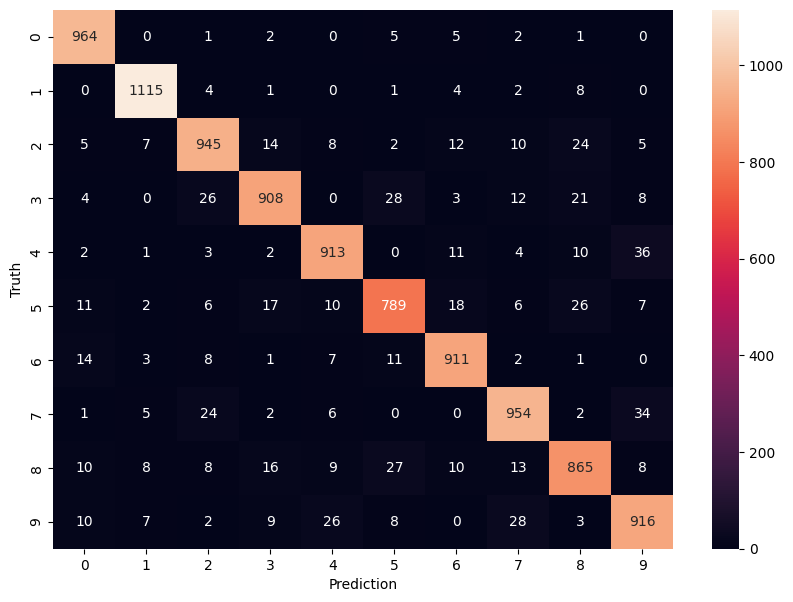

In [18]:
# Visulize the confusion matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

###### Creating simple neural netwrok with 784 input layer neurons and 100 hidden layer neurons and 10 output layer neurons
###### You can Change hidden layer elements according to trial and error

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2688 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9842


In [20]:
# Try to evalute model on test dataset
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0772 - accuracy: 0.9757


[0.07716356217861176, 0.9757000207901001]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

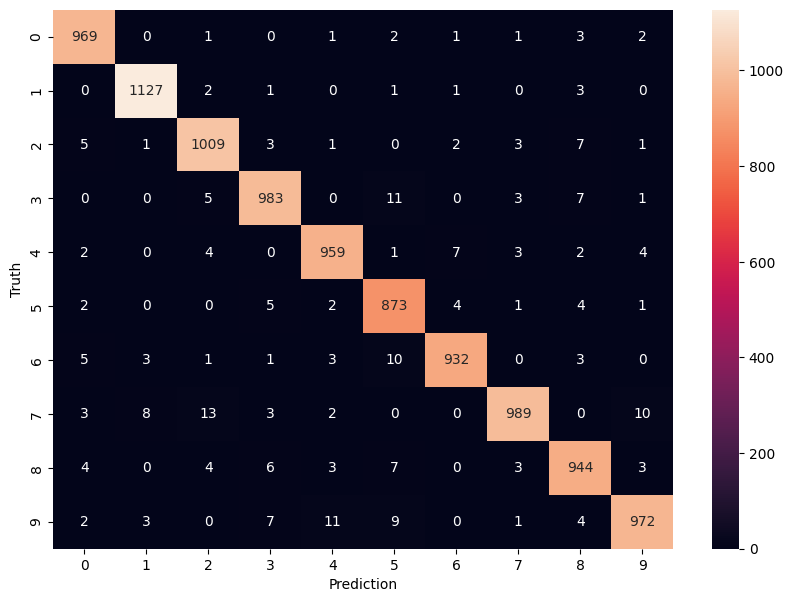

In [21]:
# Visulize the confusion matrix
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

###### Using flatten layer for scale the data insted of divided it to 255

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2686 - accuracy: 0.9239
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0834 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0504 - accuracy: 0.9841
